In [1]:
from nilearn import plotting, datasets
import pickle
import numpy as np
# from matplotlib import ticker

In [ ]:
save_dir = "states/total/cluster"
with open(f"{save_dir}/km_60s_2states.pkl", "rb") as f:
    km = pickle.load(f)

In [23]:
km.cluster_centers_.max()

0.6459131610562076

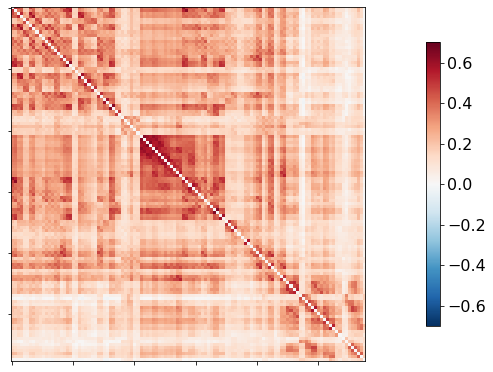

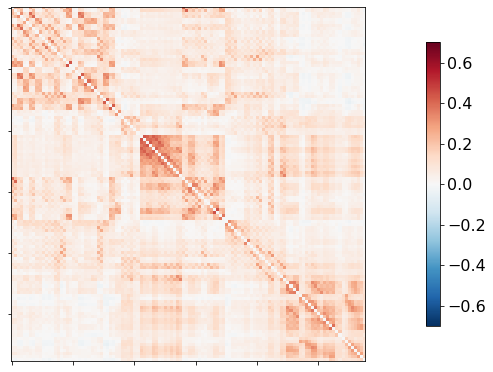

In [25]:
for i, state in enumerate(km.cluster_centers_):
    fc = state.reshape((116, 116))
    np.fill_diagonal(fc, 0)
    fc_display = plotting.plot_matrix(fc, colorbar=True, vmax=0.7, vmin=-0.7)
    fc_display.colorbar.ax.tick_params(labelsize=16)
    fig_fc, ax_fc = fc_display.figure, fc_display.axes
    fig_fc.patch.set_color("white")
    fig_fc.savefig(f"{save_dir}/center_{i}.png", format="png", bbox_inches = 'tight')

In [3]:
atlas = datasets.fetch_atlas_aal()
atlas_labels = atlas['labels']
coords = plotting.find_parcellation_cut_coords(atlas["maps"])

fcs = km.cluster_centers_
fcs = fcs.reshape((fcs.shape[0],116,116))

In [12]:
node_size = 20
edge_threshold = "95%"

In [7]:
import matplotlib.pyplot as plt

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
for i, fc in enumerate(fcs):
    plotting.plot_connectome(fc, coords, figure=fig, axes=axs[i], node_size=node_size, edge_threshold=edge_threshold, output_file=f"{save_dir}/connectome.png")